Predict housing prices

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
dataset = pd.read_csv('BostonHousing.csv')

In [17]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
features = ['lstat', 'rm']
target = 'medv'

x = dataset[features]
y = dataset[target]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=3)

In [28]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
coef = reg.coef_
incp = reg.intercept_

print('Model coefficients:', coef)
print('Model interception:', incp)

Model coefficients: [-0.72698666  4.42288449]
Model interception: 4.094516134851247


In [44]:
predict = reg.predict(x_test)

mse = mean_squared_error(y_test, predict)
print('Mean squared error: ',mse)

Mean squared error:  29.557050784229236


In [13]:
plt.scatter(x_test['lstat'], y_test, color='blue', label='Data points')
plt.plot(x_test['lstat'], reg.predict(x_test), color='red', linewidth=2, label='Regression line')
plt.xlabel('ISLAT')
plt.ylabel('MEDV')
plt.title('LSTAT vs Price')
plt.legend()
plt.show()


NameError: name 'x_test' is not defined

In [14]:
sns.scatterplot(x=y_test, y=y_predict, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
plt.xlabel('ISLAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

NameError: name 'sns' is not defined

In [ ]:
 Decision tree classifier

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

In [6]:
iris = load_iris()
x = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [8]:
clf = DecisionTreeClassifier(random_state=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]]


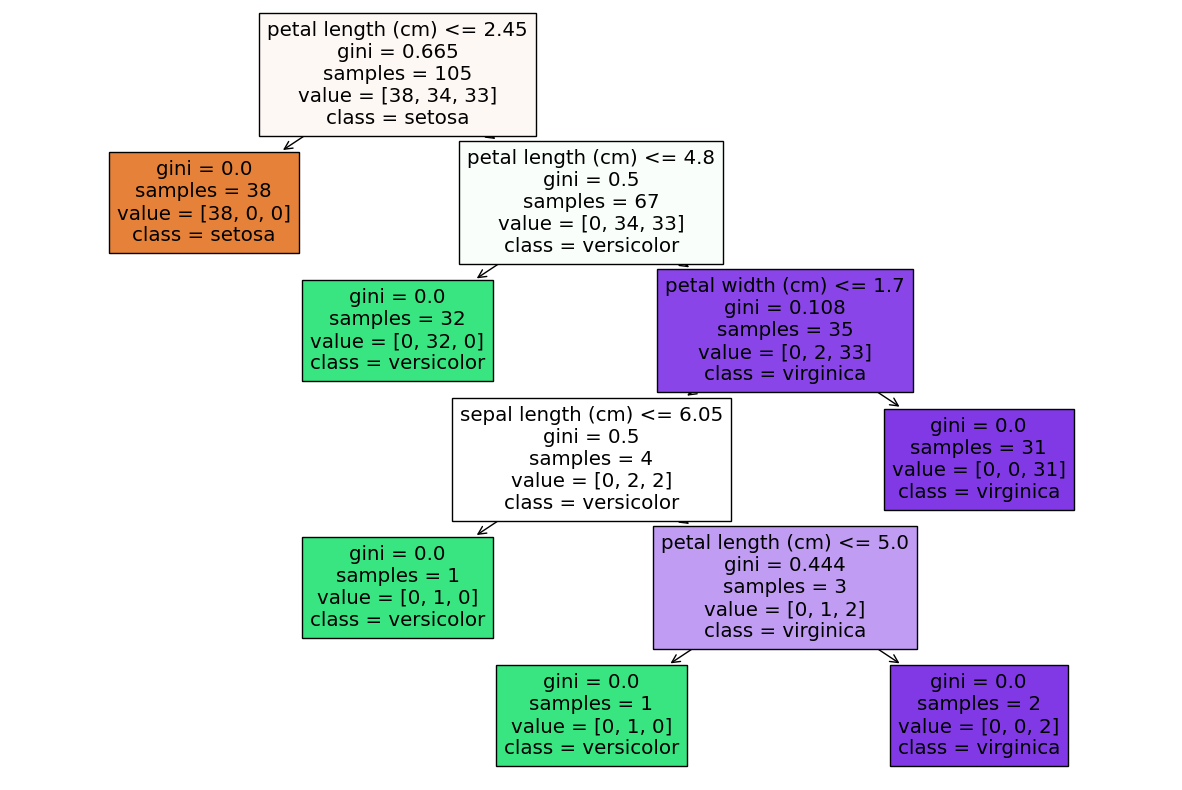

In [12]:
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()